<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-CRM-statistics" data-toc-modified-id="Get-CRM-statistics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get CRM statistics</a></span><ul class="toc-item"><li><span><a href="#Daily-statistics" data-toc-modified-id="Daily-statistics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Daily statistics</a></span></li><li><span><a href="#Daily-statistics-at-all-locations" data-toc-modified-id="Daily-statistics-at-all-locations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Daily statistics at all locations</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from netCDF4 import Dataset, MFDataset
from math import *
import glob
import string
from datetime import date, time, datetime
from pprint import pprint
import pandas as pd
import sys,os
import StringIO

plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'figure.titlesize': 'xx-large',
                     'figure.subplot.top': '0.87',
                     'figure.subplot.wspace': '0.5',
                     'figure.subplot.hspace': '0.5'})


In [88]:
# Add ../functions to system path
currentpath = %pwd
currentpath = str(currentpath)
##-- In a python script do the following instead:
##-- currentpath = os.path.dirname(os.path.realpath(__file__))

##-- Output directories --##
## Figures
figdir = os.path.join(os.path.dirname(currentpath),'figures/fullResults/CRM_rainfall')


In [3]:
inputdir = '/Users/bfildier/Data/spcam/sample_outputs'
inputfile = 'bf_FSPCAMm_AMIP_abrupt4xCO2.cam.h0.1850-04-14-00000.nc'
fh = Dataset(os.path.join(inputdir,inputfile),'r')
lon = fh.variables['lon']
lat = fh.variables['lat']
crm_prec = fh.variables['CRM_PREC']
crm_t = fh.variables['CRM_T']
crm_w = fh.variables['CRM_W']
precc = fh.variables['PRECC']
prect = fh.variables['PRECT']
ta = fh.variables['T']
u = fh.variables['U']
dx = 4
x = np.arange(0,32*dx,dx)
t = np.arange(0,24,1)



In [4]:
print fh.variables['T'].dimensions

(u'time', u'lev', u'lat', u'lon')


In [105]:
print crm_prec.shape, crm_t.shape, u.shape, ta.shape
trop_slice = slice(0,None)
# conversion_to_mm_day = 86400*1000
conversion_to_mm_day = 1
crm_prec_trop = crm_prec[:,:,:,trop_slice,:]*conversion_to_mm_day
crm_t_trop = crm_t[:,:,:,:,trop_slice,:]
crm_w_trop = crm_w[:,:,:,:,trop_slice,:]
precc_trop = precc[:,trop_slice,:]*conversion_to_mm_day
prect_trop = prect[:,trop_slice,:]*conversion_to_mm_day
ta_trop = ta[:,:,trop_slice,:]
lat_trop = lat[trop_slice]

indmax = np.unravel_index(crm_prec_trop[:].argmax(), crm_prec_trop.shape)
print "coordinates of convective-scale peak in P", lon[indmax[4]], lat_trop[indmax[3]]
indmax_prect = np.unravel_index(prect_trop[:].mean(axis=0).argmax(), prect_trop.shape[1:])
print "coordinates of large-scale peak in P", lon[indmax_prect[1]], lat_trop[indmax_prect[0]]
# print crm_t[:,0,:,indmax[3],indmax[4]]

(24, 1, 32, 96, 144) (24, 30, 1, 32, 96, 144) (24, 30, 96, 144) (24, 30, 96, 144)
coordinates of convective-scale peak in P 135.0 -8.52631578947
coordinates of large-scale peak in P 125.0 -12.3157894737


(24, 30, 96, 144)
array([ 225.80053711,  220.43478394,  218.11677551,  210.00730896,
        200.55050659,  193.1138916 ,  188.52999878,  186.60003662,
        187.94619751,  193.67184448,  202.44161987,  211.83436584,
        221.50422668,  231.06947327,  240.39759827,  249.39343262,
        257.61785889,  265.59124756,  272.19451904,  277.99798584,
        283.67074585,  288.32366943,  291.40771484,  293.41644287,
        294.68933105,  295.74713135,  296.7567749 ,  297.76626587,
        298.79528809,  299.53375244], dtype=float32)
array([ 224.87667847,  219.80747986,  216.56217957,  209.42454529,
        201.4599762 ,  194.23802185,  188.65811157,  187.17242432,
        189.14138794,  194.62557983,  202.15026855,  210.80558777,
        219.91255188,  229.41127014,  238.86401367,  248.0663147 ,
        256.59170532,  264.42874146,  271.49508667,  277.41323853,
        282.96960449,  287.80752563,  291.0703125 ,  293.04388428,
        294.29125977,  295.45736694,  296.68307495,  297.9

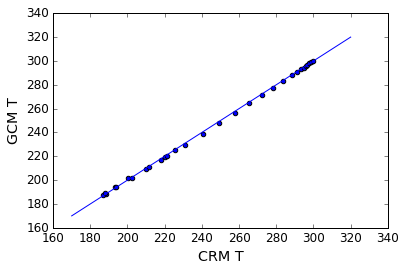

In [6]:
print ta_trop.shape
crm_t_ex = crm_t[indmax[0],::-1,0,:,indmax[3],indmax[4]].mean(axis=1)
gcm_t_ex = ta_trop[0,:,indmax[3],indmax[4]]


pprint(crm_t_ex)
pprint(gcm_t_ex)
plt.figure()
plt.scatter(crm_t_ex,gcm_t_ex)
plt.plot((170, 320),(170, 320))
plt.xlabel("CRM T")
plt.ylabel("GCM T")
plt.show()

(24, 1, 32, 96, 144) (24, 30, 1, 32, 96, 144) (24, 30, 96, 144)
coordinates of convective-scale peak in P 135.0 -8.52631578947
coordinates of large-scale peak in P 125.0 -12.3157894737


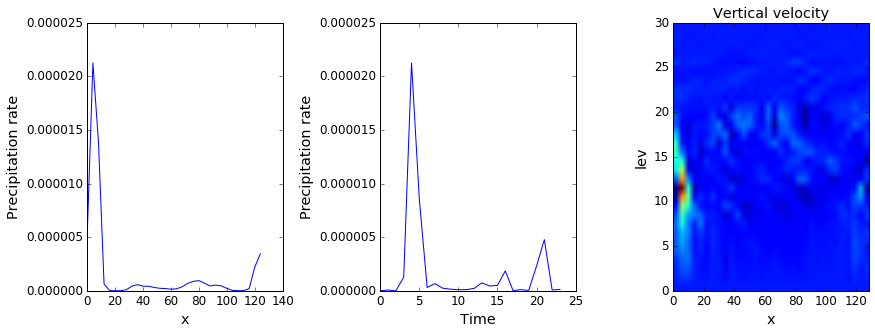

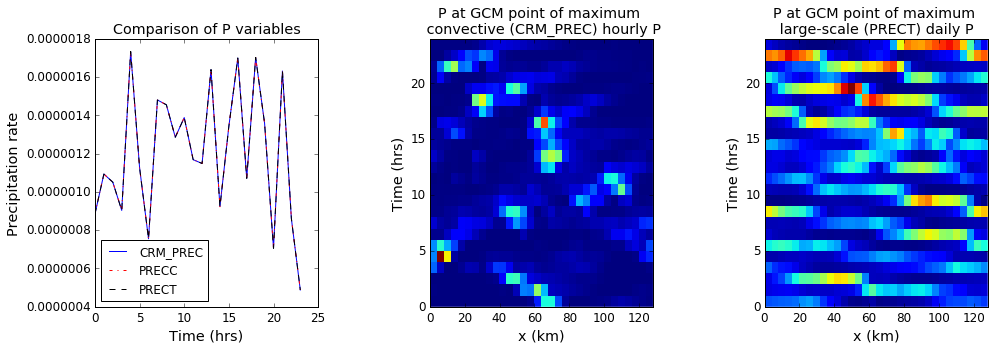

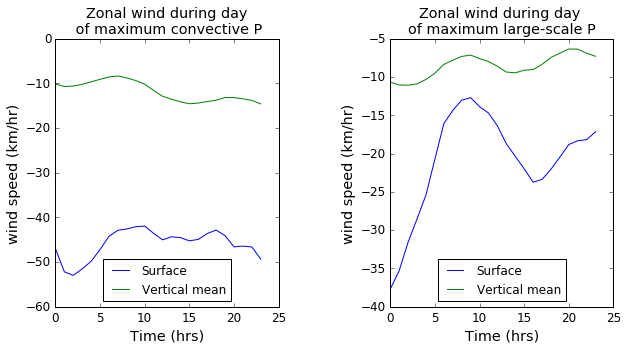

In [ ]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(131)
plt.plot(x,crm_prec_trop[indmax[0],0,:,indmax[3],indmax[4]])
plt.xlabel('x')
plt.ylabel('Precipitation rate')

fig.add_subplot(132)
plt.plot(t,crm_prec_trop[:,0,indmax[2],indmax[3],indmax[4]])
plt.xlabel('Time')
plt.ylabel('Precipitation rate')

ax = fig.add_subplot(133)
plt.title('Vertical velocity')
m = crm_w_trop[indmax[0],:,0,:,indmax[3],indmax[4]]
plt.imshow(np.flipud(m),extent=[0,128,0,30])
ax.set_aspect('auto')
plt.xlabel('x')
plt.ylabel('lev')
# cax = fig.add_axes([0.12, 0.1, 1, 1])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical')

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(131)
plt.plot(t,crm_prec_trop[:,0,:,indmax[3],indmax[4]].mean(axis=1),c='b',label='CRM_PREC')
plt.plot(t,precc_trop[:,indmax[3],indmax[4]],c='r',linestyle='-.',label='PRECC')
plt.plot(t,prect_trop[:,indmax[3],indmax[4]],c='k',linestyle='--',label='PRECT')
plt.xlabel('Time (hrs)')
plt.title('Comparison of P variables')
plt.ylabel('Precipitation rate')
plt.legend(loc='lower left')

ax = fig.add_subplot(132)
plt.title('P at GCM point of maximum \n convective (CRM_PREC) hourly P')
m = crm_prec_trop[:,0,:,indmax[3],indmax[4]]
plt.imshow(np.flipud(m),extent=[0,128,0,24],interpolation='none')
ax.set_aspect('auto')
plt.xlabel('x (km)')
plt.ylabel('Time (hrs)')

ax = fig.add_subplot(133)
plt.title('P at GCM point of maximum \n large-scale (PRECT) daily P ')
m = crm_prec_trop[:,0,:,indmax_prect[0],indmax_prect[1]]
plt.imshow(np.flipud(m),extent=[0,128,0,24],interpolation='none')
ax.set_aspect('auto')
plt.xlabel('x (km)')
plt.ylabel('Time (hrs)')

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(131)
plt.title('Zonal wind during day\n of maximum convective P')
plt.plot(t,u[:,0,indmax[3],indmax[4]]*3.6,label='Surface')
plt.plot(t,u[:,:,indmax[3],indmax[4]].mean(axis=1)*3.6,label='Vertical mean')
plt.xlabel('Time (hrs)')
plt.ylabel('wind speed (km/hr)')
plt.legend(loc='lower center')

ax = fig.add_subplot(132)
plt.title('Zonal wind during day \nof maximum large-scale P')
plt.plot(t,u[:,0,indmax_prect[0],indmax_prect[1]]*3.6,label='Surface')
plt.plot(t,u[:,:,indmax_prect[0],indmax_prect[1]].mean(axis=1)*3.6,label='Vertical mean')
plt.xlabel('Time (hrs)')
plt.ylabel('wind speed (km/hr)')
plt.legend(loc='lower center')

## Get CRM statistics

### Daily statistics

Compute mean of variable X for columns that contribute to the most intense Q% of the surface rainfall amount.

In [107]:
ind = indmax[3:5]
# ind = (42,101)
print ind, lon[ind[1]], lat_trop[ind[0]]

(43, 54) 135.0 -8.52631578947


In [112]:
import itertools
ind = indmax[3:5]
# ind = (37,73) # Apparent good point on map
# ind = (42,100)

# for ind in list(itertools.product(range(38,44),range(80,100))):
# for ind in list(itertools.product(range(38,39),range(80,81))):
for ind in [indmax[3:5]]:
    print ind, lon[ind[1]], lat_trop[ind[0]], "---",


    # data = crm_prec[indmax[0],0,:,indmax[3],indmax[4]].flatten()
    conversion_to_mm_day = 86400
    data = crm_prec[:,0,:,ind[0],ind[1]]*conversion_to_mm_day

    ### All points
    fig = plt.figure(figsize=(4.3,4.3))
    vmin = 1e-4
    vmax = 1
    ax = fig.add_subplot(111)
    plt.imshow(np.flipud(data),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest')
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
#     plt.title('Including all\n CRM points',y=1.06)
    plt.colorbar()
    plt.savefig(os.path.join(figdir,'fig_CRM-PREC_%d-%d_%2.1f-%2.1f.pdf'%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]])),
                    bbox_inches='tight')
    plt.close()
    
    ### Average over all points
    data_mean = data.copy()
    data_mean[:] = np.mean(data)
    fig = plt.figure(figsize=(4.3,4.3))
    vmin = 1e-3
    vmax = 1e2
    ax = fig.add_subplot(111)
    plt.imshow(np.flipud(data_mean),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest',cmap=plt.cm.Blues,norm = LogNorm())
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
    # plt.title('Including all\n CRM points',y=1.06)
#     plt.title("([%d,%d] %2.2f ; %2.2f)"%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]]))
    plt.colorbar()
    plt.savefig(os.path.join(figdir,'fig_CRM-PREC_mean_%d-%d_%2.1f-%2.1f.pdf'%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]])),
                    bbox_inches='tight')
    plt.close()

    ### CRM-PREC-50
    fraction = 0.5
    ind_per = indicesOfValuesAboveFraction(data,fraction)
    data_above = data.copy()
    data_above[np.logical_not(ind_per)] = None
    fig = plt.figure(figsize=(4.3,4.3))
    vmin = 1e-4
    vmax = 1
    ax = fig.add_subplot(111)
    plt.imshow(np.flipud(data_above),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest')
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
    # plt.title('Including all\n CRM points',y=1.06)
#     plt.title("([%d,%d] %2.2f ; %2.2f)"%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]]))
    plt.colorbar()
    plt.savefig(os.path.join(figdir,'fig_CRM-PREC-I50_%d-%d_%2.1f-%2.1f.pdf'%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]])),
                    bbox_inches='tight')
    plt.close()
    
    ### CRM-PREC-I50 mean
    data_above_mean = data_above.copy()
    data_above_mean[ind_per] = np.nanmean(data_above_mean)
    fig = plt.figure(figsize=(4.3,4.3))
    vmin = 1e-3
    vmax = 1e2
    ax = fig.add_subplot(111)
    plt.imshow(np.flipud(data_above_mean),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest',cmap=plt.cm.Blues,norm = LogNorm())
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
    # plt.title('Including all\n CRM points',y=1.06)
#     plt.title("([%d,%d] %2.2f ; %2.2f)"%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]]))
    plt.colorbar()
    plt.savefig(os.path.join(figdir,'fig_CRM-PREC-50_mean_%d-%d_%2.1f-%2.1f.pdf'%(ind[0],ind[1],lon[ind[1]], lat_trop[ind[0]])),
                    bbox_inches='tight')
    plt.close()

(43, 54) 135.0 -8.52631578947 --- 62


(43, 54) 135.0 -8.52631578947
(24, 32)
298
159
62
21
6
Total rain: 79.8613726383
159
Intensity threshold: 0.13087335974
298
159
62
21
6


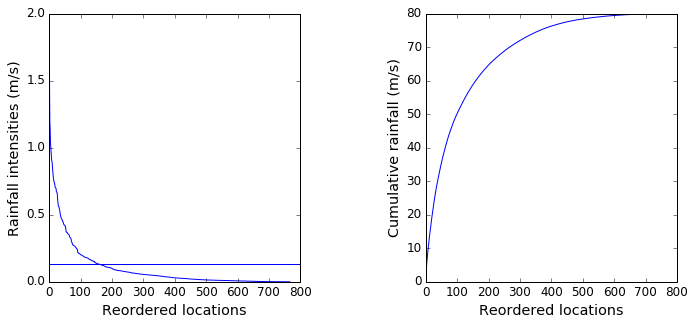

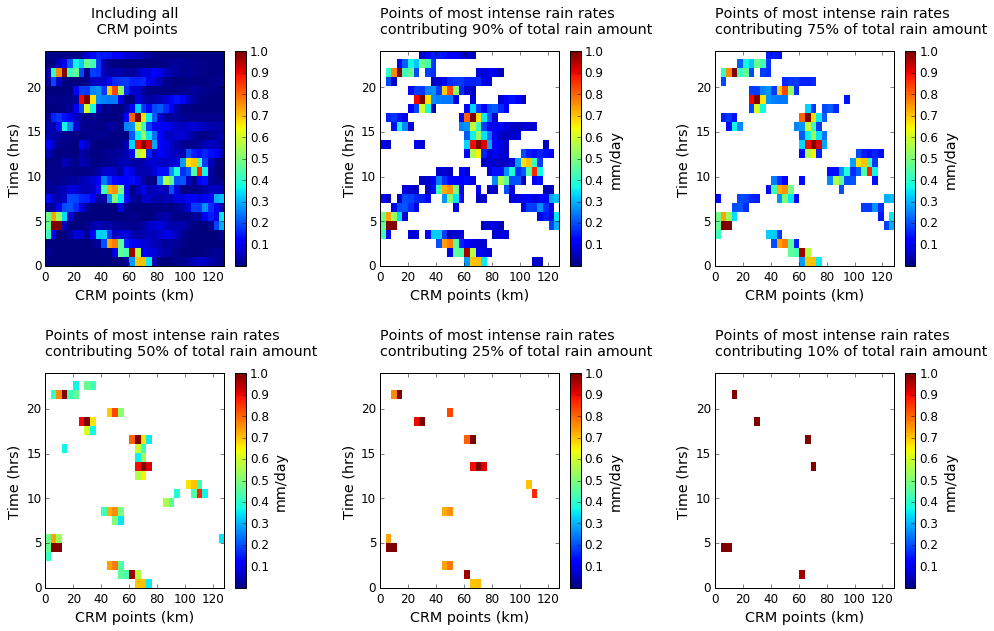

In [83]:

ind = indmax[3:5]
# ind = (37,73) # Apparent good point on map
# ind = (43,83)
print ind, lon[ind[1]], lat_trop[ind[0]]


# data = crm_prec[indmax[0],0,:,indmax[3],indmax[4]].flatten()
conversion_to_mm_day = 86400
data = crm_prec[:,0,:,ind[0],ind[1]]*conversion_to_mm_day
fraction = 0.75
pr_sorted = np.flipud(np.sort(data.flatten()))
pr_cum = np.cumsum(pr_sorted)
i_max = np.argmax(pr_cum > fraction*pr_sorted.sum())
pr_min = pr_sorted[i_max]
n = data.size

def indicesOfValuesAboveFraction(values,fraction=0.9):
    values_sorted = np.flipud(np.sort(values.flatten()))
    values_cum = np.cumsum(values_sorted)
    i_max = np.argmax(values_cum > fraction*values_sorted.sum())
    print i_max
    values_min = values_sorted[i_max]
    return np.reshape(values >= values_min, values.shape)

# Compute indices above percentage
print data.shape
ind_90per = indicesOfValuesAboveFraction(data,0.9)
ind_75per = indicesOfValuesAboveFraction(data,0.75)
ind_50per = indicesOfValuesAboveFraction(data,0.5)
ind_25per = indicesOfValuesAboveFraction(data,0.25)
ind_10per = indicesOfValuesAboveFraction(data,0.1)

print "Total rain:", pr_sorted.sum()
# print pr_cum > 0.9*pr_sorted.sum()
print i_max
print "Intensity threshold:", pr_sorted[i_max]
# print ind_90per.shape

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# Plot 
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131)
plt.plot(range(n),pr_sorted)
plt.axhline(y=pr_min)
plt.xlabel(r'Reordered locations')
plt.ylabel(r'Rainfall intensities ('+crm_prec.units+')')
ax = fig.add_subplot(132)
plt.plot(range(n),pr_cum)
plt.xlabel(r'Reordered locations')
plt.ylabel(r'Cumulative rainfall ('+crm_prec.units+')')

data_above90 = data.copy()
data_above90[np.logical_not(ind_90per)] = None
### FOR 1D
# ax = fig.add_subplot(133)
# plt.plot(x,data)
# plt.plot(x,data_above,c='r')
# plt.axhline(y=pr_min,c='k')

### FOR 2D (with time)
fig = plt.figure(figsize=(16,10))
# vmin = 0
# vmax = 1.2e-5
vmin = 1e-4
vmax = 1
percentages = (90,75,50,25,10)
ax = fig.add_subplot(231)
plt.imshow(np.flipud(data),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest')
ax.set_aspect('auto')
plt.xlabel('CRM points (km)')
plt.ylabel('Time (hrs)')
plt.title('Including all\n CRM points',y=1.06)
plt.colorbar()

for i in range(5):
    fraction = float(percentages[i])/100.
    ind_per = indicesOfValuesAboveFraction(data,fraction)
    data_above = data.copy()
    data_above[np.logical_not(ind_per)] = None
    ax = fig.add_subplot(2,3,i+2)
    plt.imshow(np.flipud(data_above),vmin=vmin,vmax=vmax,extent=[0,128,0,24],interpolation='nearest')
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
    plt.title('Points of most intense rain rates \ncontributing %d%% of total rain amount'%percentages[i],loc='left',y=1.06)
#     ax.set_title('Points of most intense rain rates \ncontributing %d%% of total rain amount'%percentages[i],loc='left')
#     plt.colorbar(format=ticker.FuncFormatter(fmt))
#     cb = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cb = plt.colorbar()
#     cb.set_label(r"km.m${}^{-2}$.s${}^{-1}$")
    cb.set_label(r"mm/day")
    
    plt.savefig(os.path.join(figdir,'fig_definition_of_convective_precipitation_rates.pdf'),
                bbox_inches='tight')


(24, 32)
298
159
62
21
6
Total rain: 79.8613726383
159
Intensity threshold: 0.13087335974
0.103986162289
298
0.240395552261
159
0.375015411564
62
0.637152342824
21
0.93279188864
6
1.24193488446


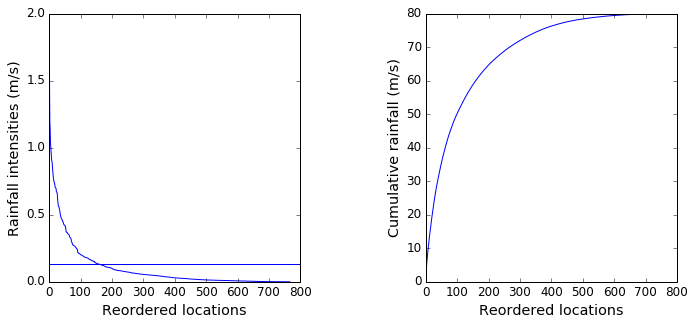

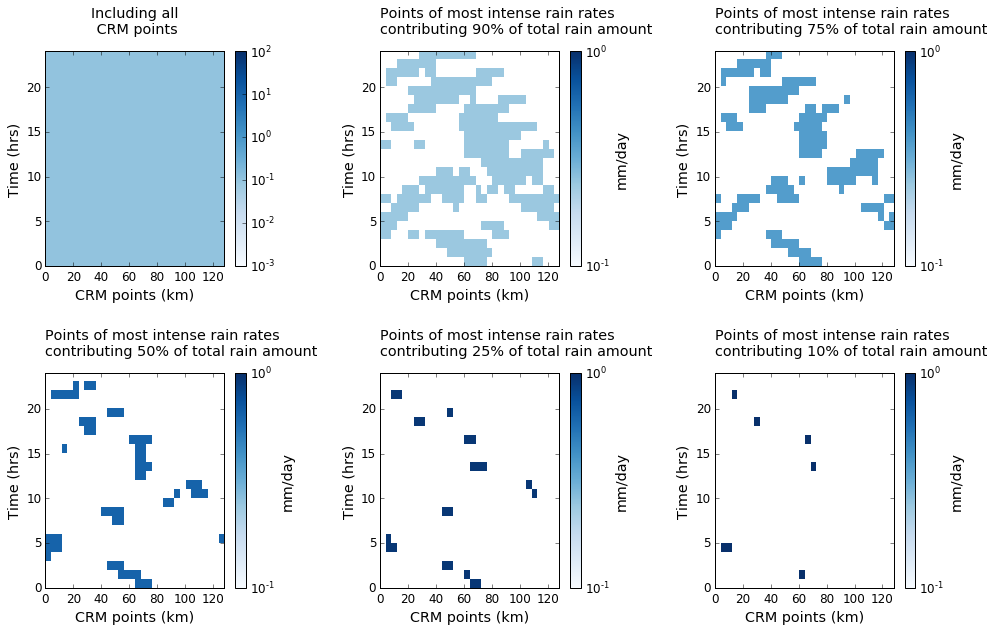

In [86]:

# data = crm_prec[indmax[0],0,:,indmax[3],indmax[4]].flatten()
conversion_to_mm_day = 86400
data = crm_prec[:,0,:,indmax[3],indmax[4]]*conversion_to_mm_day
fraction = 0.75
pr_sorted = np.flipud(np.sort(data.flatten()))
pr_cum = np.cumsum(pr_sorted)
i_max = np.argmax(pr_cum > fraction*pr_sorted.sum())
pr_min = pr_sorted[i_max]
n = data.size

def indicesOfValuesAboveFraction(values,fraction=0.9):
    values_sorted = np.flipud(np.sort(values.flatten()))
    values_cum = np.cumsum(values_sorted)
    i_max = np.argmax(values_cum > fraction*values_sorted.sum())
    print i_max
    values_min = values_sorted[i_max]
    return np.reshape(values >= values_min, values.shape)

# Compute indices above percentage
print data.shape
ind_90per = indicesOfValuesAboveFraction(data,0.9)
ind_75per = indicesOfValuesAboveFraction(data,0.75)
ind_50per = indicesOfValuesAboveFraction(data,0.5)
ind_25per = indicesOfValuesAboveFraction(data,0.25)
ind_10per = indicesOfValuesAboveFraction(data,0.1)

print "Total rain:", pr_sorted.sum()
# print pr_cum > 0.9*pr_sorted.sum()
print i_max
print "Intensity threshold:", pr_sorted[i_max]
# print ind_90per.shape

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# Plot 
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131)
plt.plot(range(n),pr_sorted)
plt.axhline(y=pr_min)
plt.xlabel(r'Reordered locations')
plt.ylabel(r'Rainfall intensities ('+crm_prec.units+')')
ax = fig.add_subplot(132)
plt.plot(range(n),pr_cum)
plt.xlabel(r'Reordered locations')
plt.ylabel(r'Cumulative rainfall ('+crm_prec.units+')')

data_above90 = data.copy()
data_above90[np.logical_not(ind_90per)] = None
### FOR 1D
# ax = fig.add_subplot(133)
# plt.plot(x,data)
# plt.plot(x,data_above,c='r')
# plt.axhline(y=pr_min,c='k')

### FOR 2D (with time)
fig = plt.figure(figsize=(16,10))
# vmin = 0
# vmax = 1.2e-5
# vmax = 1e3
percentages = (90,75,50,25,10)
ax = fig.add_subplot(231)
data_all = data.copy()
print np.mean(data_all)
data_all[:] = np.mean(data_all)
pr_min = 1e-3
pr_max = 1e2
plt.imshow(np.flipud(data_all),extent=[0,128,0,24],interpolation='nearest',\
           cmap=plt.cm.Blues,norm = LogNorm(),vmin=pr_min,vmax=pr_max)
ax.set_aspect('auto')
plt.xlabel('CRM points (km)')
plt.ylabel('Time (hrs)')
plt.title('Including all\n CRM points',y=1.06)
# plt.colorbar(format=ticker.FuncFormatter(fmt))
plt.colorbar()

pr_min = 1e-1
pr_max = 1

for i in range(5):
    fraction = float(percentages[i])/100.
    ind_per = indicesOfValuesAboveFraction(data,fraction)
    data_above = data.copy()
    data_above[np.logical_not(ind_per)] = None
    print np.mean(data_above[ind_per])
    data_above[ind_per] = np.mean(data_above[ind_per])
    ax = fig.add_subplot(2,3,i+2)
    plt.imshow(np.flipud(data_above),extent=[0,128,0,24],interpolation='nearest',\
               cmap=plt.cm.Blues,norm = LogNorm(),vmin=pr_min,vmax=pr_max)
    ax.set_aspect('auto')
    plt.xlabel('CRM points (km)')
    plt.ylabel('Time (hrs)')
    plt.title('Points of most intense rain rates \ncontributing %d%% of total rain amount'%percentages[i],loc='left',y=1.06)
#     ax.set_title('Points of most intense rain rates \ncontributing %d%% of total rain amount'%percentages[i],loc='left')
#     plt.colorbar(format=ticker.FuncFormatter(fmt))
#     cb = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cb = plt.colorbar()
#     cb.set_label(r"km.m${}^{-2}$.s${}^{-1}$")
    cb.set_label(r"mm/day")
    
    plt.savefig(os.path.join(figdir,'fig_definition_of_convective_precipitation_rates_plot_mean.pdf'),
                bbox_inches='tight')


### Daily statistics at all locations

In [24]:
print "Dimensions: ", crm_prec.shape, crm_t.shape, crm_w.shape, 

fraction = 90
indvar_values = np.zeros(crm_prec.shape)
for ilat in range(crm_prec.shape[3]):
    for ilon in range(crm_prec.shape[4]):
        values = crm_prec[:,:,:,ilat,ilon]
        f = float(fraction)/100.
        indvar_values[:,:,:,ilat,ilon] = indicesOfValuesAboveFraction(values,f)


Dimensions:  (24, 1, 32, 96, 144) (24, 30, 1, 32, 96, 144) (24, 30, 1, 32, 96, 144)


(24, 1, 32) (24, 30, 1, 32)
(30, 24, 1, 32) (30, 24, 1, 32)
(30, 298) [ 298.63012695  297.74261475  296.90026855  296.01876831  295.03530884
  293.95254517  292.67092896  290.58291626  287.19332886  282.35412598
  276.56790161  271.22653198  264.81793213  257.50665283  249.41081238
  240.50613403  230.9664917   221.18771362  211.55487061  202.30702209
  193.50767517  187.322052    187.36779785  190.09118652  193.88970947
  201.57771301  210.08129883  216.13519287  219.06980896  226.37353516]
[ 299.02166748  298.00030518  297.09130859  296.15933228  295.15103149
  294.07064819  292.76574707  290.67782593  287.2828064   282.45483398
  276.63613892  271.10586548  264.68069458  257.35861206  249.26225281
  240.34495544  230.83158875  221.09277344  211.46784973  202.21766663
  193.48109436  187.52458191  187.4175415   190.02815247  193.90489197
  201.63508606  210.04670715  216.06922913  219.08653259  226.27119446]


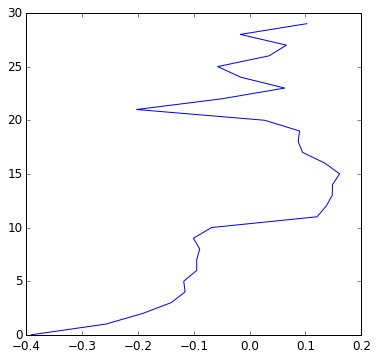

In [49]:
ilat = indmax[3]
ilon = indmax[4]
ind = np.array(indvar_values[:,:,:,ilat,ilon],dtype=bool)
values = crm_t[:,:,:,:,ilat,ilon]
nlev = values.shape[1]
print ind.shape, values.shape
ind4D_z1st = np.vstack([[ind]]*nlev)
values_z1st = values.swapaxes(0,1)
print values_z1st.shape, ind4D_z1st.shape
values_ok = values_z1st[ind4D_z1st].reshape((nlev,ind4D.sum()/nlev))
t_above_thres = values_ok.mean(axis=1)
t_mean = values_z1st.mean(axis=(1,2,3))
print values_ok.shape, values_ok.mean(axis=1)
print values_z1st.mean(axis=(1,2,3))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(t_above_thres-t_mean,range(nlev))
# plt.plot(t_mean,range(nlev))

In [59]:
values_submean = np.zeros((1,crm_t.shape[1],crm_t.shape[-2],crm_t.shape[-1]))
for ilat in range(20):
    for ilon in range(1):
        ind = np.array(indvar_values[:,:,:,ilat,ilon],dtype=bool)
        values = crm_t[:,:,:,:,ilat,ilon]
        nlev = values.shape[1]
#         print ind.shape, values.shape
        ind4D_z1st = np.vstack([[ind]]*nlev)
        values_z1st = values.swapaxes(0,1)
#         print values_z1st.shape, ind4D_z1st.shape
        values_ok = values_z1st[ind4D_z1st].reshape((nlev,ind4D_z1st.sum()/nlev))
        values_submean[0,:,ilat,ilon] = values_ok.mean(axis=1)



In [39]:
a = np.array([[1,2],[3,4]])
print a
print a.flatten()

[[1 2]
 [3 4]]
[1 2 3 4]
